<h1>Analisis Penyebab Stroke</h1>

<h2>Import Library, read dataset, dan informasi umum dataset </h2> 

In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

In [138]:
ds = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [139]:
ds.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [140]:
ds.shape

(5110, 12)

In [141]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [142]:
ds.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<h2>Data Preprocessing/ Data Cleaning</h2>

In [143]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [144]:
cek_null(ds)

     Total   Percent
bmi    201  0.039335


In [145]:
ds['bmi']=ds['bmi'].fillna(ds['bmi'].median())

In [146]:
cek_null(ds)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [147]:
ds.drop(ds[ds['gender'] == 'Other'].index, inplace = True)

<h1> Data Visualization </h1>

In [148]:
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = scp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return


<h3>Stroke General Information</h3>

([<matplotlib.patches.Wedge at 0x2b0017d58b0>,
 [Text(-1.0871311194161455, 0.16776748551789922, 'NO'),
  Text(1.0871311174527047, -0.16776749824096934, 'YES')],
 [Text(-0.5929806105906248, 0.09150953755521775, '95.1%\n(4859 Person)'),
  Text(0.5929806095196571, -0.09150954449507419, '4.9%\n(249 Person)')])

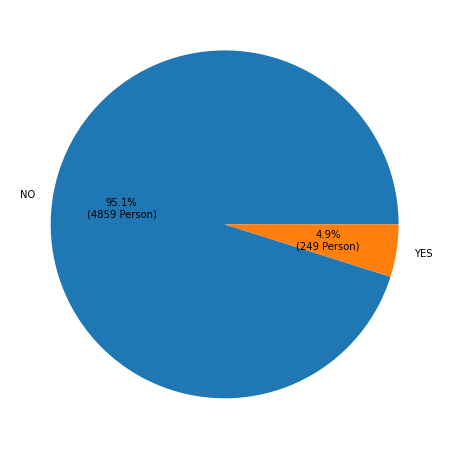

In [149]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} Person)".format(pct, absolute)


ypoint = np.array(ds['stroke'])
count_arr = np.bincount(ypoint)
stroke_0 = count_arr[0]
stroke_1 = count_arr[1]
ypoint = np.array([stroke_0, stroke_1])

plt.figure(figsize=(8,8))
plt.pie(ypoint, labels = ['NO','YES'], autopct= lambda pct: func(pct, ypoint))

<AxesSubplot:xlabel='count', ylabel='stroke'>

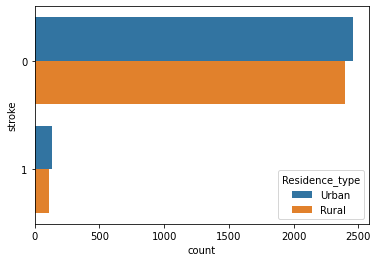

In [150]:
sns.countplot(y='stroke', hue = 'Residence_type' ,data=ds)

<AxesSubplot:xlabel='stroke', ylabel='count'>

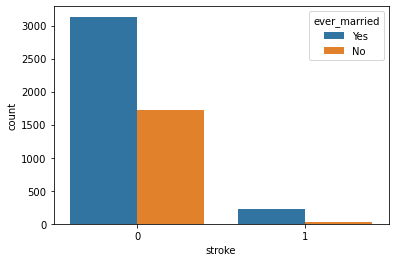

In [151]:
sns.countplot(x='stroke', hue ='ever_married' ,data=ds)

<AxesSubplot:xlabel='count', ylabel='stroke'>

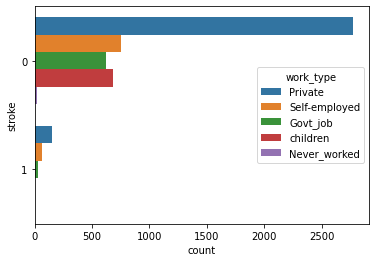

In [152]:
sns.countplot(y='stroke', hue = 'work_type' ,data=ds)

<AxesSubplot:xlabel='stroke', ylabel='count'>

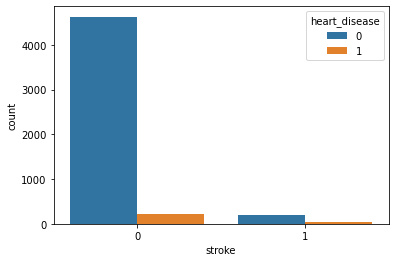

In [153]:
sns.countplot(x='stroke', hue = 'heart_disease' ,data=ds)

In [183]:
compute_freq_chi2(ds.stroke, ds.heart_disease)

Frequency table
heart_disease     0    1
stroke                  
0              4631  229
1               202   47
ChiSquare test statistic:  90.22943664078221
p-value:  2.120831133146208e-21


<hr>
<h3>Stroke By. Hypertension</h3>

<AxesSubplot:xlabel='stroke', ylabel='count'>

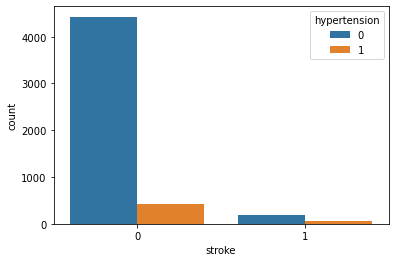

In [155]:
sns.countplot(x='stroke', hue = 'hypertension' ,data=ds)

In [156]:
compute_freq_chi2(ds.stroke, ds.hypertension)

Frequency table
hypertension     0    1
stroke                 
0             4428  432
1              183   66
ChiSquare test statistic:  81.57314462043591
p-value:  1.688936253410575e-19


<hr>
<h3>Stroke By Body Mass Index</h3>
<ul>
    <li>Underweight : <18.5 </li>
    <li>Normal BMI : 18.5 - 24.9 </li>
    <li>Overweight : 25 - 29.9</li>
    <li>Obeses : 30 - 34.9</li>
    <li>Extremly Obeses : >35 </li>
</ul>


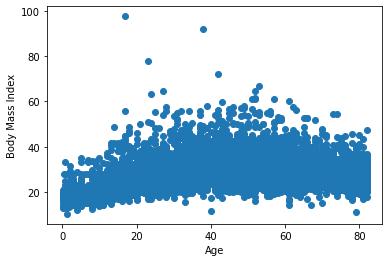

In [157]:
#Scatter plot with x label age and y label bmi
xpoint = np.array(ds['age'])
ypoint = np.array(ds['bmi'])



plt.xlabel("Age")
plt.ylabel('Body Mass Index')
plt.scatter(xpoint, ypoint)

In [158]:
#Cluster BMI
underweight = ds['bmi']<18.5
normal_bmi = ds['bmi'].between(18.5, 24.9)
overweight = ds['bmi'].between(25, 29.9)
obese = ds['bmi'].between(30, 34.9)
extr_obese = ds['bmi']>35

<h4>Stroke By Body Mass Index Underweight</h4>

<AxesSubplot:xlabel='bmi', ylabel='count'>

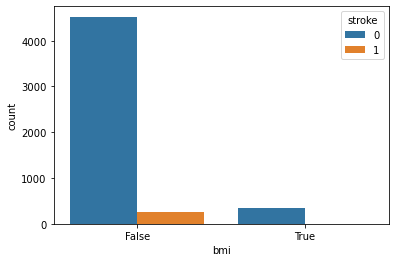

In [159]:
sns.countplot(x=underweight, hue=ds.stroke)

In [160]:
compute_freq_chi2(ds.stroke, underweight)

Frequency table
bmi     False  True
stroke             
0        4524   336
1         248     1
ChiSquare test statistic:  15.263142215353383
p-value:  9.352373249231457e-05


<h4>Stroke By Normal Body Mass Index</h4>

<AxesSubplot:xlabel='bmi', ylabel='count'>

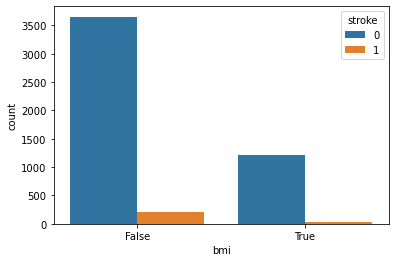

In [161]:
sns.countplot(x=normal_bmi, hue=ds.stroke)

In [162]:
compute_freq_chi2(ds.stroke, normal_bmi)

Frequency table
bmi     False  True
stroke             
0        3653  1207
1         214    35
ChiSquare test statistic:  14.376974602888227
p-value:  0.00014962072143363066


<h4>Stroke By Overweight Body Mass Index</h4>

<AxesSubplot:xlabel='bmi', ylabel='count'>

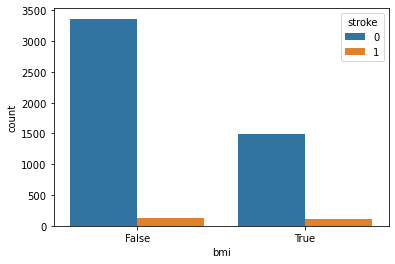

In [163]:
sns.countplot(x=overweight, hue=ds.stroke)

In [164]:
compute_freq_chi2(ds.stroke, overweight)

Frequency table
bmi     False  True
stroke             
0        3365  1495
1         134   115
ChiSquare test statistic:  25.39763177885729
p-value:  4.6649044278398294e-07


<h4>Stroke By Obese Body Mass Index</h4>

<AxesSubplot:xlabel='bmi', ylabel='count'>

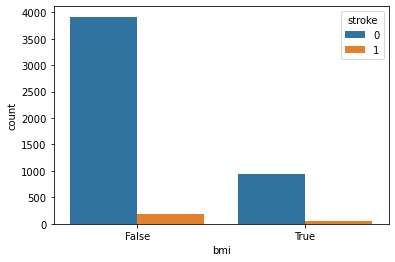

In [165]:
sns.countplot(x=obese, hue=ds.stroke)

In [166]:
compute_freq_chi2(ds.stroke, obese)

Frequency table
bmi     False  True
stroke             
0        3916   944
1         193    56
ChiSquare test statistic:  1.2264438742056187
p-value:  0.268099736201315


<h4>Stroke By Extremly Obese Body Mass Index</h4>

<AxesSubplot:xlabel='bmi', ylabel='count'>

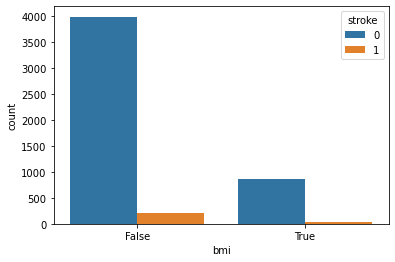

In [167]:
sns.countplot(x=extr_obese, hue=ds.stroke)

In [168]:
compute_freq_chi2(ds.stroke, extr_obese)

Frequency table
bmi     False  True
stroke             
0        3994   866
1         207    42
ChiSquare test statistic:  0.08884424557294637
p-value:  0.7656516318834197


<hr>
<h3>Stroke By Smoking Status With Gender Hue</h3>


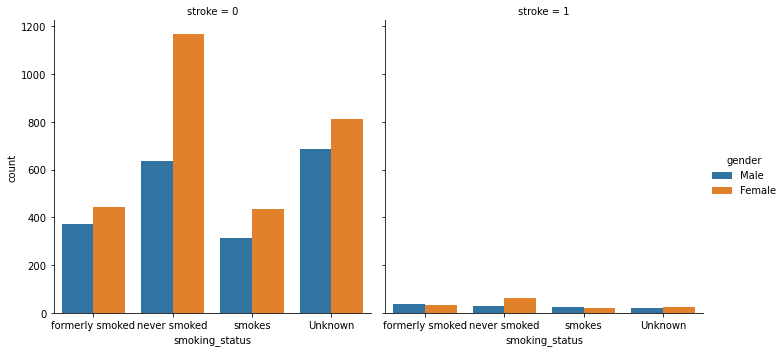

In [169]:
sns.catplot(x="smoking_status", hue="gender", col="stroke",
                data=ds, kind="count")

In [170]:
compute_freq_chi2(ds.stroke, ds.smoking_status)

Frequency table
smoking_status  Unknown  formerly smoked  never smoked  smokes
stroke                                                        
0                  1497              814          1802     747
1                    47               70            90      42
ChiSquare test statistic:  29.22572707549827
p-value:  2.0077041756108317e-06


<hr>
<h3> Stroke By Avg Glucose </h3>

In [171]:
#Clustering Avg Glucose Level
low = ds['avg_glucose_level'].between(0,100)
normal = ds['avg_glucose_level'].between(100,200)
high = ds['avg_glucose_level']>200

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

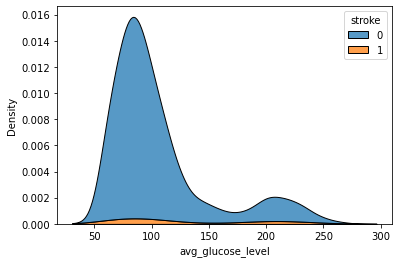

In [172]:
sns.kdeplot(data=ds, x="avg_glucose_level", hue="stroke", multiple="stack")

<h4>Low Glucose Level</h4>

<AxesSubplot:xlabel='avg_glucose_level', ylabel='count'>

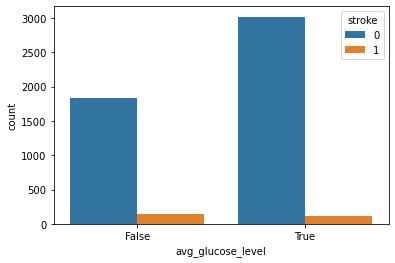

In [173]:
sns.countplot(x=low, hue=ds.stroke)

In [174]:
pd.crosstab(low, ds.stroke)

stroke,0,1
avg_glucose_level,,
False,1841,137
True,3019,112


<h4>Normal Glucose Level</h4>

<AxesSubplot:xlabel='avg_glucose_level', ylabel='count'>

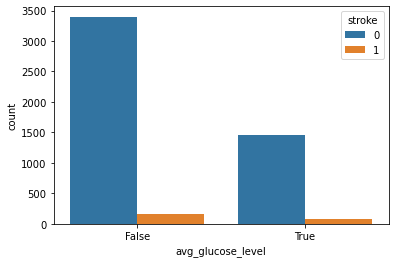

In [175]:
sns.countplot(x=normal, hue=ds.stroke)


In [176]:
pd.crosstab(normal, ds.stroke)

stroke,0,1
avg_glucose_level,,
False,3397,168
True,1463,81


<h4>High Glucose Level</h4>

<AxesSubplot:xlabel='avg_glucose_level', ylabel='count'>

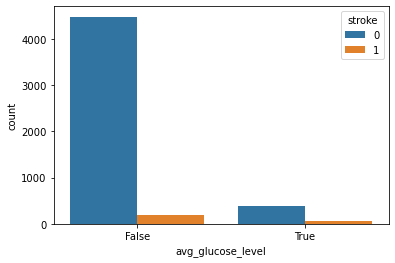

In [177]:
sns.countplot(x=high, hue=ds.stroke)


In [178]:
pd.crosstab(high, ds.stroke)

stroke,0,1
avg_glucose_level,,
False,4482,193
True,378,56


<h3>Stroke By Age</h3>

In [179]:
#Klasifikasi Umur 
age_ds = ds.loc[:, ['age']]
cleanup_age= {"age": {range(0,18):"Anak-Anak", range(18,66):"Pemuda", range(66,80):"Setengah Baya", range(80,99):"Orang Tua",
                     100 :"Lanjut Usia" }}

clone_ds = ds
clone_ds['age'] = clone_ds['age'].astype('int')
clone_ds = clone_ds.replace(cleanup_age)

<AxesSubplot:xlabel='stroke', ylabel='count'>

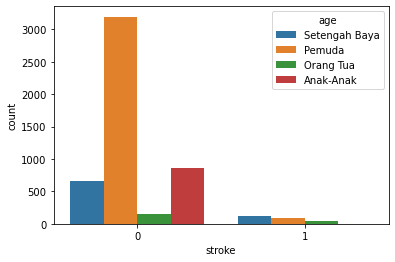

In [180]:
sns.countplot(x='stroke', hue='age', data=clone_ds)

In [181]:
pd.crosstab(clone_ds['age'], ds.stroke)

stroke,0,1
age,,
Anak-Anak,854,2
Orang Tua,146,40
Pemuda,3197,91
Setengah Baya,663,116


In [182]:
ds.corr(method='pearson')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003642,0.003610,-0.001253,0.000943,0.005708,0.006430
age,0.003642,1.000000,0.276273,0.263649,0.238212,0.324542,0.245109
hypertension,0.003610,0.276273,1.000000,0.108292,0.174540,0.158252,0.127891
heart_disease,-0.001253,0.263649,0.108292,1.000000,0.161907,0.036879,0.134905
avg_glucose_level,0.000943,0.238212,0.174540,0.161907,1.000000,0.167033,0.131991
bmi,0.005708,0.324542,0.158252,0.036879,0.167033,1.000000,0.036075
stroke,0.006430,0.245109,0.127891,0.134905,0.131991,0.036075,1.000000
